## Arboles de decisión - Vinos (Santiago Cardona Duque)

In [1]:
#Estudiante: Santiago Cardona Duque
#Programa: Ingenieria de sistemas
#Grupo: 202016908_8

In [2]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [3]:
#Establecemos nombres a las columnas del archivo a analizar
datos_wine = pd.read_csv("wine.data",
                        header=None,
                        names=["Class","Alcohol","Malic_acid", "Ash", "Alcalinity_of_ash", "Magnesium", "Total_phenols", "Flavonoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280/OD315_of_diluted wines", "Proline"]) 


In [4]:
#Verificamos que sean correctamente etiquetados
datos_wine.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavonoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
#Informe datos estadísticos
datos_wine.describe()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavonoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

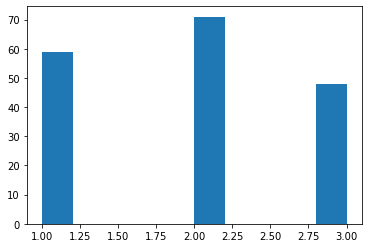

In [7]:
#N° Cantidad de elementos en clase alcohol de manera gráfica 2D
plt.hist(datos_wine.Class)

In [8]:
#Se divide el dataset 
predictors_col = ["Alcohol","Malic_acid", "Ash", "Alcalinity_of_ash", "Magnesium", "Total_phenols", "Flavonoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280/OD315_of_diluted wines", "Proline"]
target_col = ["Class"]

In [9]:
#Se asignan según su clase respectiva "predictors" o "target"
predictors = datos_wine[predictors_col]
target = datos_wine[target_col]

In [10]:
#Se seleccionan datos para hacer entrenamiento (Train) y su respectiva prueba (Test)
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=13)

In [11]:
#Se crea el arbol de decision
tree = DecisionTreeClassifier()

In [12]:
#Entrenar arbol decision con datos de entrenamiento proporcionados
arbol = tree.fit(x_train, y_train)

[Text(177.24705882352941, 199.32, 'X[12] <= 727.5\ngini = 0.659\nsamples = 133\nvalue = [45, 52, 36]'),
 Text(98.47058823529412, 163.07999999999998, 'X[11] <= 2.09\ngini = 0.48\nsamples = 79\nvalue = [1, 49, 29]'),
 Text(59.082352941176474, 126.83999999999999, 'X[10] <= 0.945\ngini = 0.225\nsamples = 31\nvalue = [0, 4, 27]'),
 Text(39.38823529411765, 90.6, 'X[6] <= 1.49\ngini = 0.069\nsamples = 28\nvalue = [0, 1, 27]'),
 Text(19.694117647058825, 54.359999999999985, 'gini = 0.0\nsamples = 27\nvalue = [0, 0, 27]'),
 Text(59.082352941176474, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(78.7764705882353, 90.6, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(137.85882352941178, 126.83999999999999, 'X[6] <= 0.795\ngini = 0.119\nsamples = 48\nvalue = [1, 45, 2]'),
 Text(118.16470588235295, 90.6, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(157.5529411764706, 90.6, 'X[1] <= 3.925\ngini = 0.043\nsamples = 46\nvalue = [1, 45, 0]'),
 Text(137.8588235294117

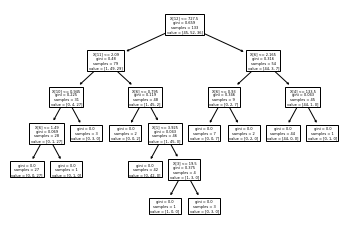

In [13]:
#Graficar el arbol de decision resultante
plot_tree(arbol)

In [14]:
#Evaluar predicciones tomando el porcentaje restante
predicciones = arbol.predict(x_test)

In [15]:
#Examinamos la matriz de confusion 
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames = ["Actual"], colnames = ["Predicciones"])

Predicciones,1,2,3
Actual,,,
1,14,0,0
2,0,19,0
3,0,2,10


In [16]:
#Porcentaje de precision comparada a informacion real
accuracy = accuracy_score(y_test, predicciones)
accuracy

0.9555555555555556